# EK381 Exploratory Data Analysis <br> Lab 7: Jointly Gaussian Random Variables and Contour Plots

### This lab was completed by Rawisara Chairat.

This lab is focused on building intuition for jointly Gaussian random variables. We will introduce contour plots as a new visualization technique as well as revisit scatter plots, fitting distributions, and generating random variables. The most important thing to remember is that *linear combinations of jointly Gaussian random variables are themselves jointly Gaussian, and are completely specified by the means, variances, and covariance (or correlation coefficient).* One useful consequence of this important fact is that, when dealing with this family of random variables, we only need to keep track of these simple statistics.

**The homework and exams include questions that ask you to roughly estimate the covariance and correlation from scatter plots, joint PDFs, and other information. **

**Please do not clear outputs for this lab, the outputs are small enough for Gradescope.**

Say $X$ and $Y$ are jointly Gaussian random variables. In the videos, we started out with the formula for the joint PDF that explicitly represents the individual means $\mathbb{E}[X], \mathbb{E}[Y]$, the individual variances $\mathrm{Var}[X], \mathrm{Var}[Y]$, and the covariance $\mathrm{Cov}[X,Y]$ (or, equivalently, the correlation coefficient $\rho_{X,Y}$). However, staring at the joint PDF formula in this form is not very useful for building intuition. Instead, let's look at the joint PDF formula when it is written using vectors and matrices.

Specifically, let us define the **mean vector** 
$$\boldsymbol{\mu} = \begin{bmatrix} \mathrm{E}[X] \\ \mathrm{E}[Y] \end{bmatrix} $$ and the **covariance matrix**
$$\mathbf{\Sigma} = \begin{bmatrix}\mathrm{Var}[X] & \mathrm{Cov}[X,Y] \\ \mathrm{Cov}[X,Y] & \mathrm{Var}[Y]  \end{bmatrix} \ .$$ Using this notation, we can express the joint PDF a bit more concisely,
$$f_{X,Y}(x,y) = \frac{1}{2 \pi \sqrt{\det{(\mathbf{\Sigma})}}} \exp\bigg(-\frac{1}{2} \big(\begin{bmatrix} x & y \end{bmatrix} - \boldsymbol{\mu}^{\top}) \mathbf{\Sigma}^{-1} \bigg( \begin{bmatrix}x \\ y \end{bmatrix} - \boldsymbol{\mu} \bigg) \bigg) \ . $$ Again, this is a hard to parse, but we can now make the following observations:
- The distribution is centered at the $(x,y)$ coordinates given by the mean vector $\boldsymbol{\mu}$.
- The ellipsoidal footprint of the distribution is determined by the covariance matrix $\mathbf{\Sigma}$. 

In [4]:
#numpy is a package for working with arrays, linear algebra, etc. and stands for "numerical Python".
import numpy as np
#pandas is a package for working with data frames.
import pandas as pd
#matplotlib is a plotting library that mimics Matlab conventions.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #for 3d plotting
#seaborn is a data visualization package.
import seaborn as sns
#scipy.stats is a statistics library
import scipy.stats as st

In [5]:
def gaussian_surface_contour(EX,EY,VarX,VarY,CovXY,plotrangeX=(-5,5),plotrangeY=(-5,5),grid_size=500):
    # Create a grid of (x,y) points
    x = np.linspace(*plotrangeX,grid_size)
    y = np.linspace(*plotrangeY,grid_size)
    X, Y = np.meshgrid(x,y)

    # Define mean vector mu and covariance matrix Sigma
    mu = np.array([EX, EY])
    Sigma = np.array([[VarX,CovXY],[CovXY,VarY]])

    # Evaluate Gaussian joint PDF over the grid
    pos = np.dstack((X, Y))
    f_XY = st.multivariate_normal(mu,Sigma).pdf(pos)

    # Plot 3d surface and contour corresponding to Gaussian joint PDF.
    fig = plt.figure()
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, f_XY,antialiased=True,cmap='viridis',alpha=0.9)
    cset = ax.contourf(X, Y, f_XY, zdir='z', offset=-0.25, cmap='viridis',alpha=0.9)
    plt.xlabel('x')
    plt.ylabel('y')
    ax.set_zlim(-0.25,np.max(f_XY))
    plt.show()        
    plt.tight_layout()

To get started with our visualizations, let's first spend a minute to understand what a contour plot represents. In Lab 5, we plotted the 3D surface plot corresponding to the joint PDF for a few scenarios. The contour plot can be thought of flattening the joint PDF 3D surface onto the 2D plane, while using colors to represent the height of the PDF. We've provided you with the function `gaussian_surface_contour` that plots the 3D surface plot with the corresponding 2D contour plot underneath. **Play around with the parameters and look at the resulting plots to gain intuition for the contour plot and how it relates to the joint PDF surface plot. For the remainder of the lab, we will only use the contour plot.**

<Figure size 640x480 with 0 Axes>

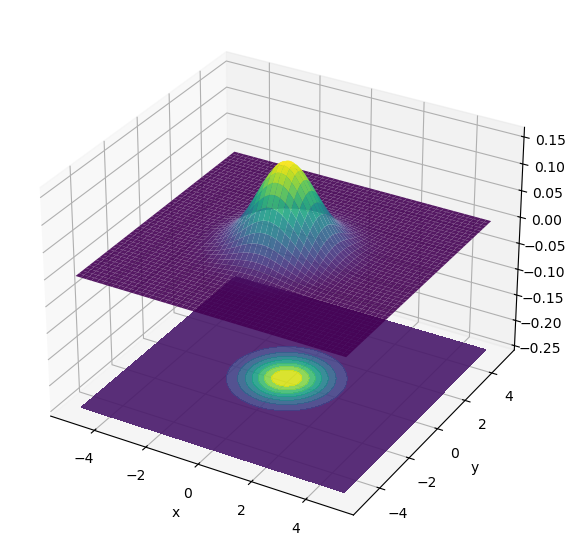

<Figure size 640x480 with 0 Axes>

In [6]:
EX = 0
EY = 0
VarX = 1
VarY = 1
CovXY = 0
gaussian_surface_contour(EX,EY,VarX,VarY,CovXY)

In [7]:
def gaussian_contour(EX,EY,VarX,VarY,CovXY,plotrangeX=(-5,5),plotrangeY=(-5,5),grid_size=200):
    #Display error message if a requested variance is negative.
    if VarX <= 0:
        raise ValueError(f"Error: VarX must be greater than 0. (Requested value = {VarX})")
    if VarY <= 0:
        raise ValueError(f"Error: VarY must be greater than 0. (Requested value = {VarY})")
    #Display error message if the requested covariance is outside the feasible range.
    if (CovXY >= np.sqrt(VarX*VarY)) | (CovXY <= -np.sqrt(VarX*VarY)):
        raise ValueError(f"Error: CovXY must be between -np.sqrt(VarX*VarY) and +np.sqrt(VarX*VarY). (Requested value = {CovXY}, Acceptable range for VarX = {VarX} and VarY = {VarY}: {-np.sqrt(VarX*VarY)} < CovXY < {np.sqrt(VarX*VarY)})")
    
    # Create a grid of (x,y) points
    x = np.linspace(*plotrangeX,grid_size)
    y = np.linspace(*plotrangeY,grid_size)
    X, Y = np.meshgrid(x,y)

    # Define mean vector mu and covariance matrix Sigma
    mu = np.array([EX, EY])
    Sigma = np.array([[VarX,CovXY],[CovXY,VarY]])

    # Evaluate Gaussian joint PDF over the grid
    pos = np.dstack((X, Y))
    GaussianPDF = st.multivariate_normal(mu,Sigma)
    f_XY = st.multivariate_normal(mu,Sigma).pdf(pos)

    plt.contourf(X, Y, f_XY, levels=10, cmap='viridis')
    plt.colorbar(label='Probability Density')
    plt.title('Gaussian Contour Plot for E[X] = ' + str(EX) + ', E[Y] = ' + str(EY) + '\n Var[X] = ' + str(VarX) + ", Var[Y] = " + str(VarY) + ", Cov[X,Y] = " + str(CovXY))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()        
    plt.tight_layout()

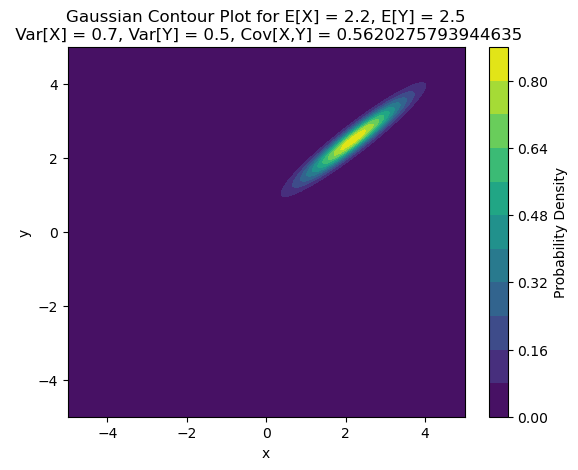

<Figure size 640x480 with 0 Axes>

In [135]:
EX = 2.2
EY = 2.5
VarX = 0.7
VarY = 0.5
rhoXY = 0.95 #Easier to work with the correlation coefficient 
CovXY = rhoXY * np.sqrt(VarX*VarY)
gaussian_contour(EX,EY,VarX,VarY,CovXY)

---
####  L7.1 Download the image `gaussianscenarios.png` from the Lab 7 folder. For each scenario, experiment with the `gaussian_contour` plotting function above to try to guess the parameters that were used to generate the plot. You do not have to be exactly right, but your choices should lead to a very similar image. Note that rhoXY refers to $\rho_{XY}$, the correlation coefficient. (We had originally written the prompts below using mathematical typesetting but this would likely have lead to many more errors due to inadvertent typos.)
---
#### Scenario 1
#### EX = 2, EY = 2, VarX = 2, VarY = 1, rhoXY = 0

#### Scenario 2
#### EX = -2, EY = -2, VarX = 0.5, VarY = 0.5, rhoXY = -0.5

#### Scenario 3
#### EX = -4, EY = 1.25, VarX = 0.1, VarY = 2.7, rhoXY = 0

#### Scenario 4
#### EX = 2.2, EY = 2.5, VarX = 0.7, VarY = 0.5, rhoXY = 0.95 

#### Scenario 5
#### EX = 0, EY = 0, VarX = 0.05, VarY = 4, rhoXY = 0.95

#### Scenario 6
#### EX = 0, EY = -2, VarX = 4, VarY = 0.8, rhoXY = -0.96 

The command `contourf` that is invoked in `gaussian_contour` creates a filled-in contour plot that closely matches the color scheme in the 3D surface plot. However, this color scheme makes it hard to see anything else, such as a scatter plot. The code `gaussian_contour_lines` below is written in a more minimalist fashion. Specifically, it calls `contour` to only display the contour lines, and it takes as inputs the mean vector `mu` and the covariance matrix `Sigma` directly. This will be convenient when we estimate these parameters from a dataset. Finally, it allows us to set the color map using `cmap`, which is set to `'Blues'` by default. 

(For anyone interested, the reason we are providing this code, rather than ask you to invoke `contour` directly, is that we need to create a grid of points in the (x,y)-plane to be evaluate and then plot the joint PDF. The function `np.meshgrid` takes in a vector of x evaluation points and a vector of y evaluation points and returns the desired 2D grid of points over those ranges.)

In [39]:
def gaussian_contour_lines(mu,Sigma,cmap='Blues'):
    #Convert pandas objects to numpy arrays if needed
    if isinstance(mu, pd.Series):
        mu = mu.to_numpy()
    if isinstance(Sigma, pd.DataFrame):
        Sigma = Sigma.to_numpy()
    #Display error message if a requested variance is negative.
    plotscale = 2
    xmin = mu[0] - plotscale*np.sqrt(Sigma[0,0])
    xmax = mu[0] + plotscale*np.sqrt(Sigma[0,0])
    ymin = mu[1] - plotscale*np.sqrt(Sigma[1,1])
    ymax = mu[1] + plotscale*np.sqrt(Sigma[1,1])

    grid_size = 100
    
    # Create a grid of (x,y) points
    x = np.linspace(xmin,xmax,grid_size)
    y = np.linspace(ymin,ymax,grid_size)
    X, Y = np.meshgrid(x,y)

    # Evaluate Gaussian joint PDF over the grid
    pos = np.dstack((X, Y))
    f_XY = st.multivariate_normal(mu,Sigma).pdf(pos)

    plt.contour(X,Y,f_XY,cmap=cmap, linewidths=2, levels=6)

Let's now generate jointly Gaussian random variables and examine how the scatter plot corresponds to the contour plot. Below is an example, feel free to play with the parameters to see how things change. Note that the x-axis and y-axis will adapt to fit the generated data, so looking at the shape may not tell you everything.

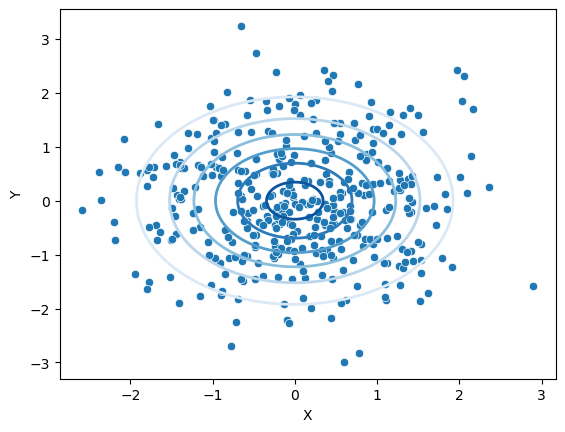

In [40]:
EX = 0
EY = 0
mu = np.array([EX,EY]) #Organize into mean vector
VarX = 1
VarY = 1
rhoXY = 0 #Easier to work with the correlation coefficient
CovXY = rhoXY * np.sqrt(VarX*VarY)
Sigma = np.array([[VarX, CovXY],[CovXY, VarY]]) #Organize into covariance matrix
GaussianRVs = st.multivariate_normal.rvs(mu,Sigma,400) #Generate Gaussian random variables
Gaussian_df = pd.DataFrame(columns=["X","Y"],data=GaussianRVs) #Create a dataframe
sns.scatterplot(data=Gaussian_df,x = "X", y = "Y") #Scatter plot
gaussian_contour_lines(mu,Sigma) #Add contour lines

So far, our contour plots have used the true values of the parameters `mu` and `Sigma.` However, in practice, it is more typical to estimate these from the data and then plot the corresponding contour plot. The code below provides an example based on `Gaussian_df` from above. 

Sample Mean Vector


X    0.022869
Y   -0.016880
dtype: float64

Sample Covariance Matrix


,X,Y
X,0.961054,-0.002813
Y,-0.002813,1.077120


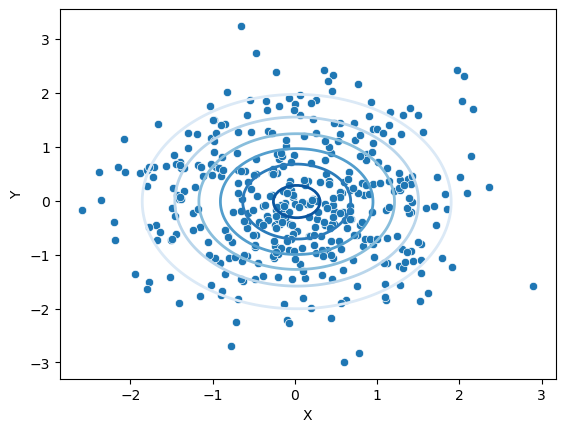

In [41]:
muhat = Gaussian_df.mean() #calculate sample mean vector
Sigmahat = Gaussian_df.cov() #estimate covariance matrix
print("Sample Mean Vector")
display(muhat)
print("Sample Covariance Matrix")
display(Sigmahat)
sns.scatterplot(data=Gaussian_df,x = "X", y = "Y") #Scatter plot
gaussian_contour_lines(muhat,Sigmahat) #Add contour lines

Using code from Lab 4, we can plot a histogram for a single variable and fit a Gaussian distribution on top. Let's try this for the X data from above. As expected, for a jointly Gaussian pair of random variables, the individual variables are Gaussian as well.

Sample Mean


0.022869402311695014

Sample Variance


0.9610538898959112

Text(0.5, 1.0, 'Histogram and Fitted Gaussian Distribution')

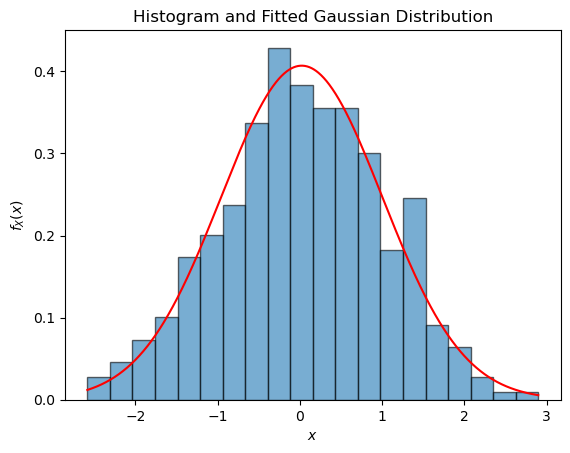

In [42]:
df = Gaussian_df["X"]
plt.hist(df,density=True,edgecolor="black",alpha=0.6,bins=20) #Plot a histogram of the feature.
gaussian_range = np.linspace(df.min(),df.max(),1000) #Use the dataframe min and max values to establish a range for PDF plotting.
#Sample Mean
print("Sample Mean")
display(df.mean())
#Sample Variance
print("Sample Variance")
display(df.var())
gaussian_pdf = st.norm.pdf(gaussian_range,df.mean(),df.std()) #Create a Gaussian PDF using the mean and standard deviation from the dataframe.
plt.plot(gaussian_range,gaussian_pdf,color="red") #Plot the PDF.
plt.xlabel("$x$")
plt.ylabel("$f_X(x)$")
plt.title("Histogram and Fitted Gaussian Distribution")

---
####  L7.2 Recall that, for jointly Gaussian random variables $X$ and $Y$, any linear combination is itself a Gaussian random variable. For this problem, let $Z = X + Y$ with $X$ and $Y$ generated above as part of `Gaussian_df`. You can create a column with the values of $X + Y$ using `Gaussian_df["X"] + Gaussian_df["Y"]`. Using the code above, calculate the sample mean and sample variance of $Z$, plot the histogram, and overlay a fitted Gaussian distribution. Are these values close to the values you would expect from pen-and-paper calculations? Specifically, work out $\mathbb{E}[Z]$ and $\mathrm{Var}[Z]$ analytically and comment on how close these agree with the values estimated from the data.
---
#### Answer: $\mathbb{E}[Z]$ is $\mathbb{E}[X+Y]$ = $\mathbb{E}[X]$ + $\mathbb{E}[Y]$ which is 0 + 0 = 0 which is close to the value calculated here which is 0.0059895463925312645. 
#### For $\mathbb{Var}[Z]$ is $\mathbb{Var}[X+Y]$ = $\mathbb{Var}[X]$ + $\mathbb{Var}[Y]$ + 2 $\mathbb{Cov}[X,Y]$ = 1 + 1 + 0 = 2 which is close to the value calculated at 2.032548920320043.
####


(Hint: Make sure you keep the original parameters EX=0, EY=0, VarX=1, VarY=1, rhoXY=0 for generating `Gaussian_df`.) 

Sample Mean


0.0059895463925312645

Sample Variance


2.032548920320043

Text(0.5, 1.0, 'Histogram and Fitted Gaussian Distribution')

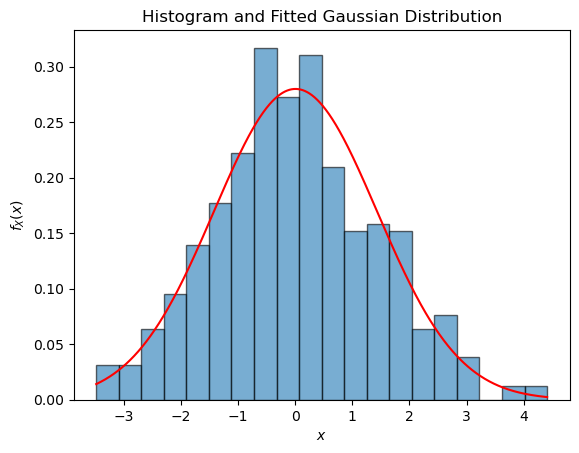

In [43]:
df = Gaussian_df["X"] + 
plt.hist(df,density=True,edgecolor="black",alpha=0.6,bins=20) #Plot a histogram of the feature.
gaussian_range = np.linspace(df.min(),df.max(),1000) #Use the dataframe min and max values to establish a range for PDF plotting.
#Sample Mean
print("Sample Mean")
display(df.mean())
#Sample Variance
print("Sample Variance")
display(df.var())
gaussian_pdf = st.norm.pdf(gaussian_range,df.mean(),df.std()) #Create a Gaussian PDF using the mean and standard deviation from the dataframe.
plt.plot(gaussian_range,gaussian_pdf,color="red") #Plot the PDF.
plt.xlabel("$x$")
plt.ylabel("$f_X(x)$")
plt.title("Histogram and Fitted Gaussian Distribution")

---
####  L7.3 The code below generates correlated jointly Gaussian $V$ and $W$ with $\mathbb{E}[V] = 2, \mathbb{E}[W] = -1, \mathrm{Var}[V] = 4, \mathrm{Var}[W] = 1, \rho_{VW} = -0.5$. For this problem, let $U = V + 2W + 1$ with $V$ and $W$. Calculate the sample mean and sample variance of $U$, plot the histogram, and overlay a fitted Gaussian distribution. Specifically, work out $\mathbb{E}[U]$ and $\mathrm{Var}[U]$ analytically and comment on how close these agree with the values estimated from the data. Make sure you comment on why $\mathrm{Var}[U]$ is significantly smaller than $\mathrm{Var}[V] + 4 \mathrm{Var}[W] = 4  + 4 = 8$. 
---
#### Answer: $\mathrm{Var}[U]$ is significantly smaller than $\mathrm{Var}[V] + 4 \mathrm{Var}[W] = 4  + 4 = 8$ because in this formula it uses $\mathrm{Var}[U] = \mathrm{Var}[V] + 4 \mathrm{Var}[W] + 2*2*1 \mathrm{Cov}[V,W]$ and since $\rho_{VW} = -0.5$ meaning that $\mathrm{Cov}[V,W]$ = $\rho_{VW}$ *  $\sqrt{\mathrm{Var}[V] \mathrm{Var}[W]} $. So, $\mathrm{Var}[U] = \mathrm{Var}[V] + 4 \mathrm{Var}[W] + 4*(-0.5) \sqrt{4*1} = 4 + 4 - 4 = 4.$ In the formula it adds the $\mathrm{Cov}[V,W]$ and since $\rho_{VW}$ < 0 then will reduce the value of $\mathrm{Var}[U]$ causing the $\mathrm{Var}[U]$ in the formula to be a lot less than 8.
####

(Hint: Make sure you keep the original parameters EV=2, EW=-1, VarV=4, VarW=1, rhoVW=-0.5 for generating `corrGaussian_df`.) 

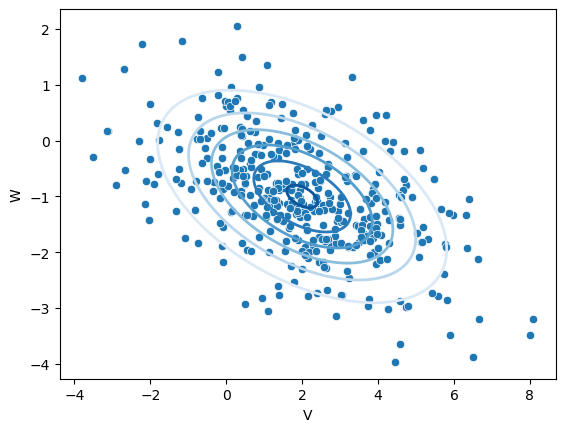

In [44]:
EV = 2
EW = -1
mu = np.array([EV,EW]) #Organize into mean vector
VarV = 4
VarW = 1
rhoVW = -0.5 #Easier to work with the correlation coefficient
CovVW = rhoVW * np.sqrt(VarV*VarW)
Sigma = np.array([[VarV, CovVW],[CovVW, VarW]]) #Organize into covariance matrix
corrGaussianRVs = st.multivariate_normal.rvs(mu,Sigma,400) #Generate Gaussian random variables
corrGaussian_df = pd.DataFrame(columns=["V","W"],data=corrGaussianRVs) #Create a dataframe
sns.scatterplot(data=corrGaussian_df,x = "V", y = "W") #Scatter plot
gaussian_contour_lines(mu,Sigma) #Add contour lines

Sample Mean


0.9392272253238496

Sample Variance


3.932981822908856

Text(0.5, 1.0, 'Histogram and Fitted Gaussian Distribution')

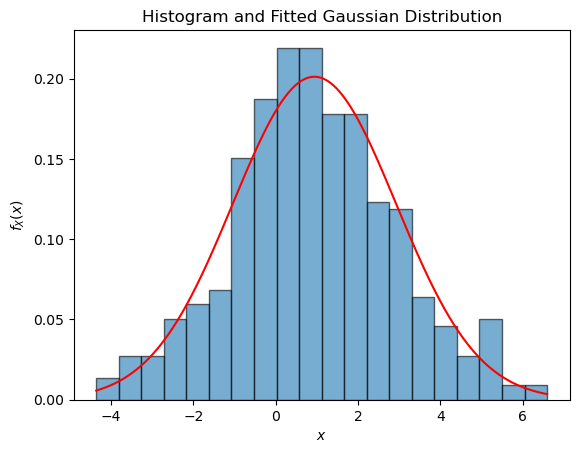

In [48]:
df = corrGaussian_df["V"] + 2*corrGaussian_df["W"] + 1
plt.hist(df,density=True,edgecolor="black",alpha=0.6,bins=20) #Plot a histogram of the feature.
gaussian_range = np.linspace(df.min(),df.max(),1000) #Use the dataframe min and max values to establish a range for PDF plotting.
#Sample Mean
print("Sample Mean")
display(df.mean())
#Sample Variance
print("Sample Variance")
display(df.var())
gaussian_pdf = st.norm.pdf(gaussian_range,df.mean(),df.std()) #Create a Gaussian PDF using the mean and standard deviation from the dataframe.
plt.plot(gaussian_range,gaussian_pdf,color="red") #Plot the PDF.
plt.xlabel("$x$")
plt.ylabel("$f_X(x)$")
plt.title("Histogram and Fitted Gaussian Distribution")

Let's return to the penguins dataset from Lab 1. The code below loads the dataset, displays the dataframe, plots a scatter plot of the bill length and bill depth, and overlays a Gaussian contour plot for the sample mean and covariance matrix. Make sure the change the filepath if needed.

In [49]:
penguins_path = "datasets/penguins.csv" #Put your copied filepath to penguins.csv inside the quotes to the left.
penguins_df = pd.read_csv(penguins_path)
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


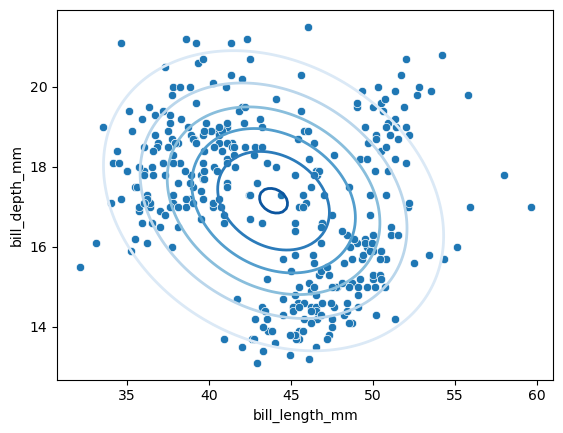

In [50]:
sns.scatterplot(data=penguins_df,x = "bill_length_mm", y = "bill_depth_mm") #Scatter plot
muhat = penguins_df[["bill_length_mm","bill_depth_mm"]].mean() #calculate sample mean vector
Sigmahat = penguins_df[["bill_length_mm","bill_depth_mm"]].cov() #estimate covariance matrix
gaussian_contour_lines(muhat,Sigmahat) #Add contour lines

---
####  L7.4 Comment on how well the Gaussian contour plot above fits the penguin data. Keep in mind that the density of points should be roughly equal along the contour lines.
---
#### Answer: The Gaussian contour plot doesn't fit the data well since that is a gap of data all around the contour line.
####

---
####  L7.5 The code below plots three scatter plots in different colors, based on the penguin species. Your job is to estimate the sample mean and sample covariance matrix for each species separately. Next, plot all three corresponding Gaussian contours on the figure. Finally, comment on whether this seems like a better model of the dataset.
##### Hint: Remember that to select all of the rows of the dataframe with a particular value, say all of the rows where the species is Adelie, you can use the command `adelie_df = penguins_df[penguins_df["species"] == "Adelie"]`. You can also add the parameter `cmap = "Oranges"` or `cmap = "Greens"` to `gaussian_contour_lines` to change the color of the contour lines.

---
#### Answer: The Gaussian contours is better since it fits data really well as the data spreads equally all around its own contour lines.
####

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

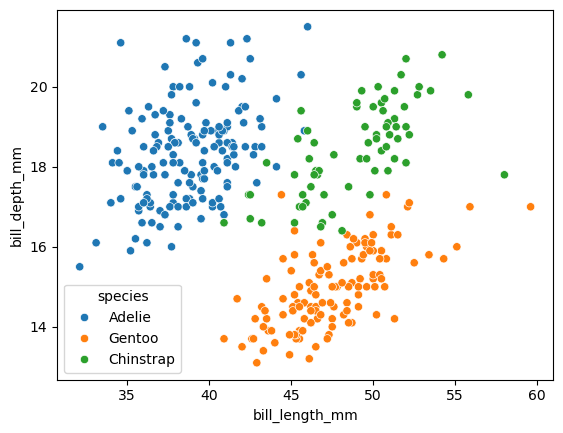

In [51]:
sns.scatterplot(data=penguins_df,x = "bill_length_mm", y = "bill_depth_mm",hue="species") #Scatter plot

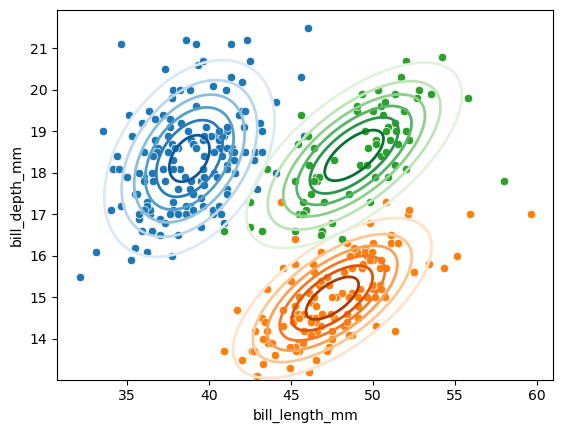

In [67]:
adelie_df = penguins_df[penguins_df["species"] == "Adelie"]
gentoo_df = penguins_df[penguins_df["species"] == "Gentoo"]
chinstrap_df = penguins_df[penguins_df["species"] == "Chinstrap"]
sns.scatterplot(data=adelie_df,x = "bill_length_mm", y = "bill_depth_mm") #Scatter plot
sns.scatterplot(data=gentoo_df,x = "bill_length_mm", y = "bill_depth_mm")
sns.scatterplot(data=chinstrap_df,x = "bill_length_mm", y = "bill_depth_mm")
muhat_a = adelie_df[["bill_length_mm","bill_depth_mm"]].mean() #calculate sample mean vector
muhat_g = gentoo_df[["bill_length_mm","bill_depth_mm"]].mean()
muhat_c = chinstrap_df[["bill_length_mm","bill_depth_mm"]].mean()
Sigmahat_a = adelie_df[["bill_length_mm","bill_depth_mm"]].cov()
Sigmahat_g = gentoo_df[["bill_length_mm","bill_depth_mm"]].cov()
Sigmahat_c = chinstrap_df[["bill_length_mm","bill_depth_mm"]].cov()#estimate covariance matrix
gaussian_contour_lines(muhat_a,Sigmahat_a, cmap = "Blues") #Add contour lines
gaussian_contour_lines(muhat_g,Sigmahat_g, cmap = "Oranges") #Add contour lines
gaussian_contour_lines(muhat_c,Sigmahat_c, cmap = "Greens") #Add contour lines